In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv("E:/house sales/train.csv")
dftest=pd.read_csv("E:/house sales/test.csv")

In [18]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df.shape

(1460, 81)

In [20]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [21]:
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature' ], axis = 1)

In [22]:
df = df.drop('FireplaceQu', axis = 1)

In [23]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [24]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
                ... 
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond   

In [25]:
corr = df.corr()

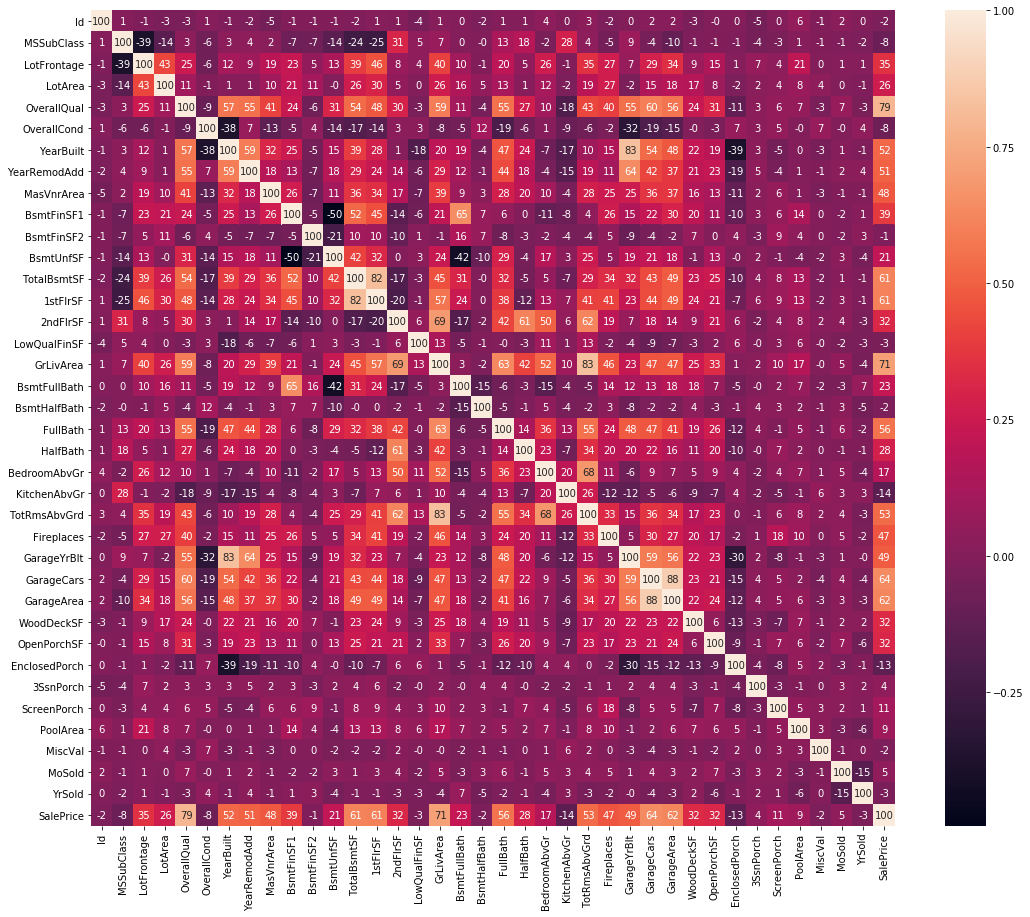

In [26]:
plt.figure(figsize=(18,15))
sns.heatmap(data=corr, annot=corr*100, fmt='.0f')
plt.show()

In [27]:
df.LotFrontage=df.LotFrontage.fillna(0)
df.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [28]:
df.LotFrontage.isnull().sum()

0

In [29]:
cf = df[['SalePrice','LotFrontage','OverallQual','YearBuilt','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageCars']]

In [30]:
categorical = df.dtypes[df.dtypes == 'object'].index

In [31]:
categorical = df[categorical]

In [32]:
categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [33]:
categorical["Sales"]=np.nan # new column sales is made
categorical.columns

C:\Users\Alok\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'Sales'],
      dtype='object')

In [34]:
gf=categorical[['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']]

In [35]:
gf.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
0,Gd,TA,Gd,TA,Ex,Gd,TA,TA
1,TA,TA,Gd,TA,Ex,TA,TA,TA
2,Gd,TA,Gd,TA,Ex,Gd,TA,TA
3,TA,TA,TA,Gd,Gd,Gd,TA,TA
4,Gd,TA,Gd,TA,Ex,Gd,TA,TA


In [36]:
fdf = pd.concat([cf, gf], axis=1)

In [37]:
fdf.head()

,SalePrice,LotFrontage,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
0,208500,65.0,7,2003,856,856,854,1710,2,8,0,2,Gd,TA,Gd,TA,Ex,Gd,TA,TA
1,181500,80.0,6,1976,1262,1262,0,1262,2,6,1,2,TA,TA,Gd,TA,Ex,TA,TA,TA
2,223500,68.0,7,2001,920,920,866,1786,2,6,1,2,Gd,TA,Gd,TA,Ex,Gd,TA,TA
3,140000,60.0,7,1915,756,961,756,1717,1,7,1,3,TA,TA,TA,Gd,Gd,Gd,TA,TA
4,250000,84.0,8,2000,1145,1145,1053,2198,2,9,1,3,Gd,TA,Gd,TA,Ex,Gd,TA,TA


In [38]:
fdf.shape

(1460, 20)

In [39]:
fdf = pd.get_dummies(fdf, columns=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond'])

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [41]:
target=fdf.SalePrice
features=fdf.drop('SalePrice',axis=1)


In [42]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [43]:
alg=RandomForestRegressor(n_estimators=100)

In [44]:
alg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [47]:
y=alg.predict(x_test)

In [49]:
r2_score(y_test,y)

0.840407133250551

In [50]:
alg.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
alg=GradientBoostingRegressor()

In [53]:
alg.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [54]:
y=alg.predict(x_test)

In [55]:
r2_score(y_test,y)

0.8709096506687464